In [48]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # Ignorer un warning dans la cross-validation

import sys
sys.path.append('../modules')
from clustering_questions import *

In [49]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
df= pd.read_csv("../data/df_reponses.csv", index_col = "node_id")
df

,006F52E9102A8D3BE2FE5614F42BA989_0.0,006F52E9102A8D3BE2FE5614F42BA989_1.0,006F52E9102A8D3BE2FE5614F42BA989_nan,013D407166EC4FA56EB1E1F8CBE183B9_0.0,013D407166EC4FA56EB1E1F8CBE183B9_1.0,013D407166EC4FA56EB1E1F8CBE183B9_nan,02522A2B2726FB0A03BB19F2D8D9524D_0.0,02522A2B2726FB0A03BB19F2D8D9524D_1.0,02522A2B2726FB0A03BB19F2D8D9524D_nan,02E74F10E0327AD868D138F2B4FDD6F0_0.0,...,F7E6C85504CE6E82442C770F7C8606F0_nan,FA7CDFAD1A5AAF8370EBEDA47A1FF1C3_0.0,FA7CDFAD1A5AAF8370EBEDA47A1FF1C3_1.0,FA7CDFAD1A5AAF8370EBEDA47A1FF1C3_nan,FBD7939D674997CDB4692D34DE8633C4_0.0,FBD7939D674997CDB4692D34DE8633C4_1.0,FBD7939D674997CDB4692D34DE8633C4_nan,FC221309746013AC554571FBD180E1C8_0.0,FC221309746013AC554571FBD180E1C8_1.0,FC221309746013AC554571FBD180E1C8_nan
node_id,,,,,,,,,,,,,,,,,,,,,
2c90f5883f44af68013f564a1326558a,0,1,0,1,0,0,0,1,0,1,...,0,0,0,1,0,1,0,0,0,1
2c90f5883fcf3281013fe7c2f0eb4dbe,0,1,0,0,1,0,1,0,0,1,...,0,0,0,1,0,1,0,1,0,0
2c90f588404b48480140ce4d7d301013,1,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,1,0
2c90f5884109d2c401410c40ae942d95,0,1,0,0,1,0,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0
2c90f5884109d2c401410c4434a433a6,0,1,0,1,0,0,1,0,0,1,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff808181717a658e017181c0a2022261,0,1,0,1,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,1,0
ff808181717a658e017181c124ca22c6,0,1,0,1,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,1,0
ff808181725806fc017299554104555f,0,0,1,1,0,0,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1


In [54]:
# Base de textes utilisée pour la comparaison

df_reponses= pd.read_csv("../data/df_reponses.csv")
df_text_prop = pd.read_csv("../data/clust.csv")

df_text_prop2=df_text_prop.loc[df_text_prop['txt_node_id'].isin(list(df_reponses['node_id']))]

compte=pd.DataFrame(df_text_prop2.sum(axis=0)).iloc[1:,:].sort_values(by=[0])
#On a 443 clients donc on cherche à supprimer les textes qui apparaissent chez moins de 9% des clients soit moins de 40 fois
compte.columns=['nombre']
liste_texte_non=list(compte.loc[compte['nombre']<40].index)
liste_texte_oui=list(compte.loc[compte['nombre']>=40].index)

txt_client = pd.read_csv("../raw_data/deep_course_cf_text_version_nodes.csv", low_memory = False)

# Textes les plus fréquents

In [21]:
# Texte à gauche, client à droite
txt_client = txt_client.loc[txt_client["txt_version_surrogate_uuid"].isin(liste_texte_oui)]
txt_client

,txt_version_surrogate_uuid,txt_node_id
1,d37394453a046068013a0c21f6824adc,2c90f5883f44af68013f564a1326558a
2,d37394453c64588f013c70d1f1b31b49,2c90f5883f44af68013f564a1326558a
3,d3739445374d5348013783ef84d41b5c,2c90f5883f44af68013f564a1326558a
4,d373944539678fdb0139a42ace673d21,2c90f5883f44af68013f564a1326558a
5,d373944535c610f20135ec1883a854bf,2c90f5883f44af68013f564a1326558a
...,...,...
329937,2c90f58949c4b4ca0149f1e9b745274f,ff80818173787da801739e854673578c
329938,ff8081816cc9b7d5016cccca8dfc14e7,ff80818173787da801739e854673578c
329939,d3739445333b0e9c01336996466c31a1,ff80818173787da801739e854673578c
329940,d373944534afdf1e0134b3bb69031a2d,ff80818173787da801739e854673578c


In [53]:
len(txt_client[txt_client["txt_node_id"].isin(df.index)]["txt_version_surrogate_uuid"])

239494

In [47]:
txt_client["txt_node_id"].nunique()

572

### Validation croisée sans shuffle

 1  cluster(s)
0  faux négatifs  parmi  239494  textes à identifier

faux_negatifs
0    443
En moyenne  0.0 faux négatifs par client, soit 0.0 au total
La médiane est de  0.0  faux négatifs

 2  cluster(s)
202  faux négatifs  parmi  239494  textes à identifier

faux_negatifs
0     430
2       1
3       1
4       1
5       1
10      2
11      2
12      1
13      1
23      1
38      1
60      1
En moyenne  0.45598194130925507 faux négatifs par client, soit 202.0 au total
La médiane est de  0.0  faux négatifs

 3  cluster(s)
795  faux négatifs  parmi  239494  textes à identifier

faux_negatifs
0     404
1       6
3       2
4       1
5       1
6       1
8       2
9       3
14      1
15      1
17      1
18      3
20      2
22      2
23      1
27      1
29      1
30      1
32      2
33      1
36      1
41      1
44      1
58      1
72      1
84      1
En moyenne  1.7945823927765236 faux négatifs par client, soit 795.0 au total
La médiane est de  0.0  faux négatifs

 4  cluster(s)
1423  faux 

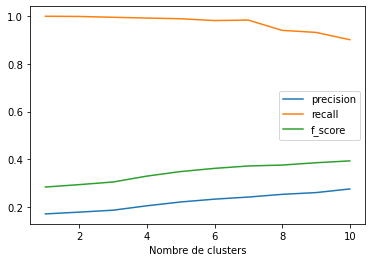

In [69]:
cross_validation(df, txt_client, n_clusters=range(1,11), K=10, shuffle=False)

### Validation croisée avec shuffle

 1  cluster(s)
0  faux négatifs  parmi  239494  textes à identifier

faux_negatifs
0    443
En moyenne  0.0 faux négatifs par client, soit 0.0 au total
La médiane est de  0.0  faux négatifs

 2  cluster(s)
107  faux négatifs  parmi  239494  textes à identifier

faux_negatifs
0     431
1       4
2       2
3       2
9       1
23      1
28      1
33      1
En moyenne  0.24153498871331827 faux négatifs par client, soit 107.0 au total
La médiane est de  0.0  faux négatifs

 3  cluster(s)
475  faux négatifs  parmi  239494  textes à identifier

faux_negatifs
0     404
1      17
2       3
3       2
4       1
7       4
8       1
9       1
10      1
15      1
24      1
30      1
36      1
43      1
46      1
50      1
60      1
83      1
En moyenne  1.072234762979684 faux négatifs par client, soit 475.0 au total
La médiane est de  0.0  faux négatifs

 4  cluster(s)
1668  faux négatifs  parmi  239494  textes à identifier

faux_negatifs
0      380
1       13
2        3
3        3
4        2
5     

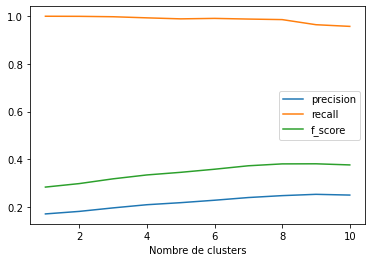

In [70]:
cross_validation(df, txt_client, n_clusters=range(1,11), K=10, shuffle=True)

In [ ]:
#Validation croisée, sans shuffle
cross_validation(df, txt_client, n_clusters=range(1,11), K=10, shuffle=False)

1
On a en moyenne  0.0 faux-négatifs par client, soit 0.0 au total
2
On a en moyenne  0.45598194130925507 faux-négatifs par client, soit 202.0 au total
3
On a en moyenne  1.7945823927765236 faux-négatifs par client, soit 795.0 au total
4
On a en moyenne  3.2121896162528216 faux-négatifs par client, soit 1423.0 au total
5
On a en moyenne  6.841986455981941 faux-négatifs par client, soit 3031.0 au total
6
On a en moyenne  12.153498871331829 faux-négatifs par client, soit 5384.0 au total
7
On a en moyenne  12.659142212189616 faux-négatifs par client, soit 5608.0 au total
8
On a en moyenne  34.67042889390519 faux-négatifs par client, soit 15358.999999999998 au total
9
On a en moyenne  38.20316027088036 faux-négatifs par client, soit 16924.0 au total
10


# Textes les moins fréquents

In [52]:
txt_client = txt_client.loc[txt_client["txt_version_surrogate_uuid"].isin(liste_texte_non)]
txt_client

,txt_version_surrogate_uuid,txt_node_id
0,d37394453d6ac204013d6d847b0a4b3a,2c90f5883f44af68013f564a1326558a
12,d37394c52dba36fd012e04540b122440,2c90f5883f44af68013f564a1326558a
14,d37394c52786ffe00127aa573aa453a6,2c90f5883f44af68013f564a1326558a
15,d37394c52657b4010126ad3f2c2f1062,2c90f5883f44af68013f564a1326558a
16,d37394c523fb2004012434c56e0e72b1,2c90f5883f44af68013f564a1326558a
...,...,...
329889,ff80818173787da8017380fcc7b27c2e,ff80818173787da801739e854673578c
329895,ff808181742779cf0174491129507e5c,ff80818173787da801739e854673578c
329897,ff808181742779cf01744921feb92856,ff80818173787da801739e854673578c
329906,ff80818171c7c7500171e921c6c12ff9,ff80818173787da801739e854673578c


In [53]:
len(txt_client[txt_client["txt_node_id"].isin(df.index)]["txt_version_surrogate_uuid"])

23034

### Validation croisée sans shuffle

 1  cluster(s)
387  faux négatifs  parmi  23034  textes à identifier

faux_negatifs
0     317
1      55
2      27
3       9
4       9
5       6
6       7
7       3
9       2
10      1
12      3
13      1
14      1
15      1
16      1
En moyenne  0.873589164785553 faux négatifs par client, soit 387.0 au total
La médiane est de  0.0  faux négatifs

 2  cluster(s)
859  faux négatifs  parmi  23034  textes à identifier

faux_negatifs
0     288
1      60
2      29
3      13
4       8
5       6
6       8
7       6
8       1
9       4
10      2
12      2
13      2
14      1
16      1
19      2
20      2
21      1
22      1
26      1
27      1
31      1
47      1
73      1
81      1
En moyenne  1.9390519187358917 faux négatifs par client, soit 859.0 au total
La médiane est de  0.0  faux négatifs

 3  cluster(s)
1696  faux négatifs  parmi  23034  textes à identifier

faux_negatifs
0      267
1       55
2       21
3       15
4        8
5        6
6        7
7        4
8        4
9        4
10    

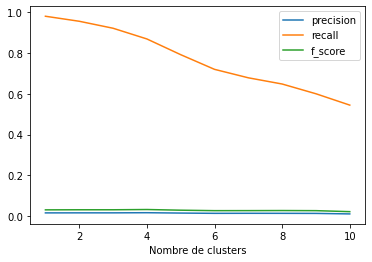

In [40]:
cross_validation(df, txt_client, n_clusters=range(1,11), K=10, shuffle=False)

# Tous les textes

 1  cluster(s)
6630  faux négatifs  parmi  268771  textes à identifier

faux_negatifs
0      75
1      50
2      30
3      35
4      28
5      29
6      25
7      15
8      22
9      12
10      8
11      6
12     13
13      4
14      6
15      3
16      5
17      3
18      7
19      5
20      7
21      4
22      3
23      1
24      1
25      1
26      1
27      2
28      1
30      1
31      2
35      1
37      1
42      2
43      1
51      1
53      1
56      1
61      1
63      1
72      1
84      1
98      1
99      1
108     3
110     2
111     1
112     1
113     1
115     2
116     1
119     1
125     1
126     1
130     1
142     1
143     1
150     1
154     1
189     1
205     2
210     1
262     1
En moyenne  14.966139954853274 faux négatifs par client, soit 6630.0 au total
La médiane est de  5.0  faux négatifs

 2  cluster(s)
7304  faux négatifs  parmi  268771  textes à identifier

faux_negatifs
0      70
1      47
2      31
3      33
4      27
5      28
6      25
7      15
8

33330  faux négatifs  parmi  268771  textes à identifier

faux_negatifs
0        7
1       22
2       13
3       19
4       14
5       17
6       18
7       17
8       11
9        5
10       8
11      15
12       5
13      11
14       5
15       4
16       7
17       7
18      12
19       2
20       3
21       5
22       5
23       2
24       4
25       2
26       2
27       6
28       3
31       4
32       7
34       2
35       2
36       1
37       4
38       2
39       2
40       2
41       1
42       3
43       1
44       2
45       1
46       1
47       3
48       2
49       2
50       4
51       1
52       3
53       5
54       2
57       4
58       1
59       2
60       1
61       1
62       2
63       3
64       3
65       7
66       1
67       1
68       1
70       3
75       1
76       1
78       1
79       1
80       1
85       1
89       1
90       1
91       2
92       2
93       1
97       1
100      2
101      2
103      1
105      1
106      1
111      1
114      2
116 

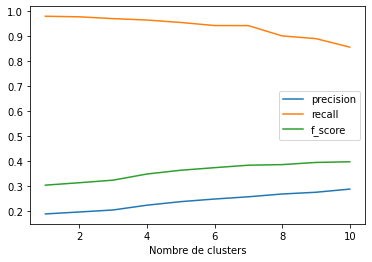

In [55]:
cross_validation(df, txt_client, n_clusters=range(1,11), K=10, shuffle=False)